In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import pandas as pd
import numpy as np
import pyblock

# Manual style for plots
import sys
sys.path.append('../')
import style
from blockAverage import blockAverage

In [4]:
sys=['pkG_peG','pkA_peA','pkL_peL','pkkg_peeg','pkka_peea','pkkl_peel']
data = []

for sys_nms in ['pkG_peG','pkA_peA','pkL_peL','pkkg_peeg','pkka_peea','pkkl_peel']:
    tmp1=pd.read_csv("data/"+sys_nms+"/"+sys_nms+"_intra_all.dat",delimiter='\t')
    tmp2=pd.read_csv("data/"+sys_nms+"/inter_all.dat",delim_whitespace=True)
    
    data.append( pd.concat([tmp1,tmp2],axis=1) )
    data[-1].rename(columns={"HB_00001[UU]": "inter", "intra_count": "intra"},inplace=True)
    data[-1].drop(columns=["frame","#Frame"],inplace=True)

In [5]:
data[0]

,intra,inter
0,0,0
1,2,0
2,6,0
3,8,7
4,5,6
...,...,...
3746,15,102
3747,11,85
3748,17,90
3749,11,93


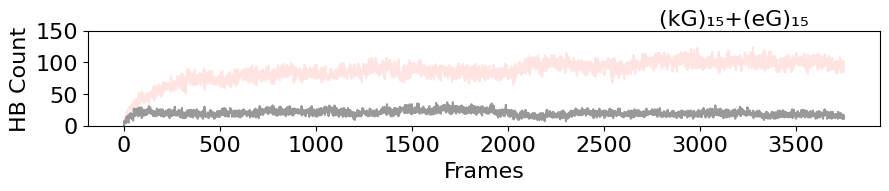

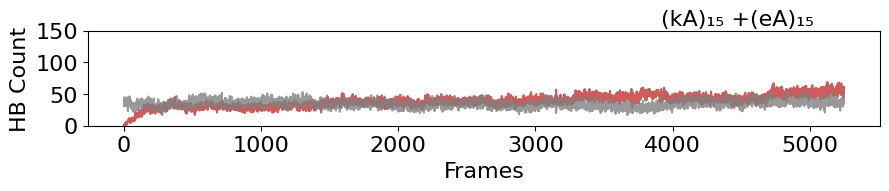

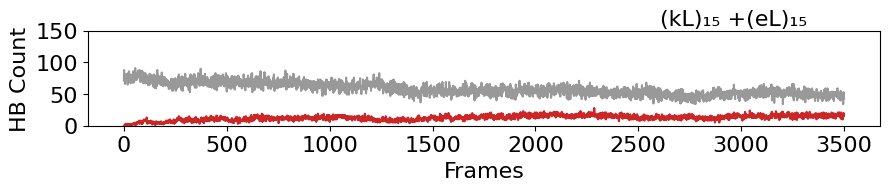

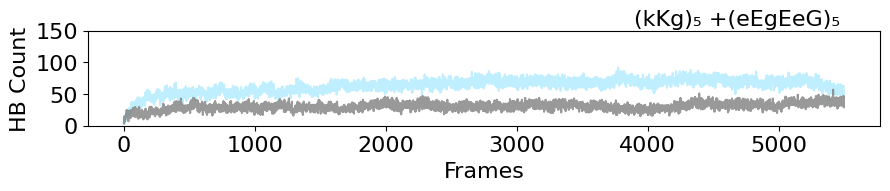

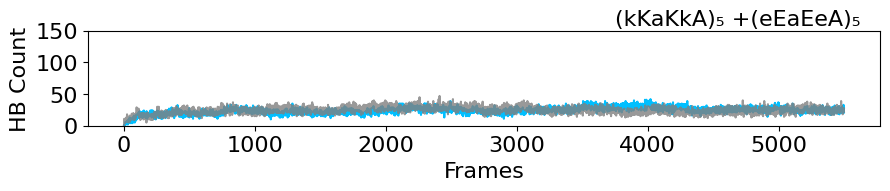

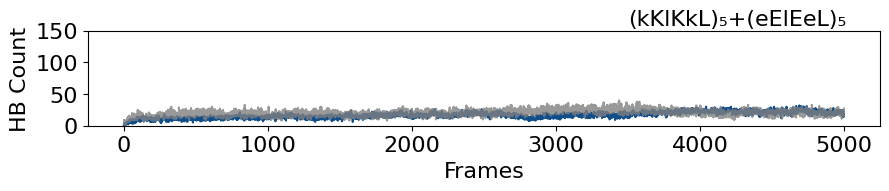

In [6]:
for i in range(6):
    plt.figure(figsize=(9,2))
    plt.plot(data[i]["inter"],color=style.color_arr[i])
    plt.plot(data[i]["intra"],color='grey',alpha=0.8)
    
    plt.title(style.sys_labels[i],y=0.97,x=0.82,fontsize=style.font_size)
    plt.ylabel('HB Count',fontsize=style.font_size)
    plt.xlabel('Frames',fontsize=style.font_size)
    plt.ylim(0,150)
    plt.yticks(fontsize=style.font_size)
    plt.xticks(fontsize=style.font_size)
    plt.tight_layout()
    #plt.savefig("HB_P_series"+str(i)+".png",dpi=600)

<x> = 20.413551 +/- 0.982979

<x> = 34.423565 +/- 1.212852

<x> = 55.949266 +/- 3.575894

<x> = 32.015354 +/- 1.237738

<x> = 24.448264 +/- 0.871999

<x> = 21.998999 +/- 1.050873

<x> = 92.813084 +/- 3.711694

<x> = 44.149533 +/- 2.429399

<x> = 13.434246 +/- 0.808955

<x> = 69.371829 +/- 0.922727

<x> = 26.107143 +/- 1.201471

<x> = 19.215955 +/- 1.564106



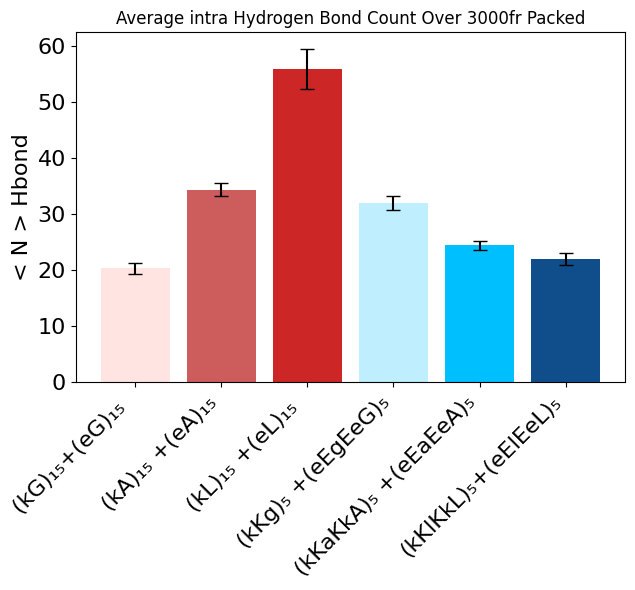

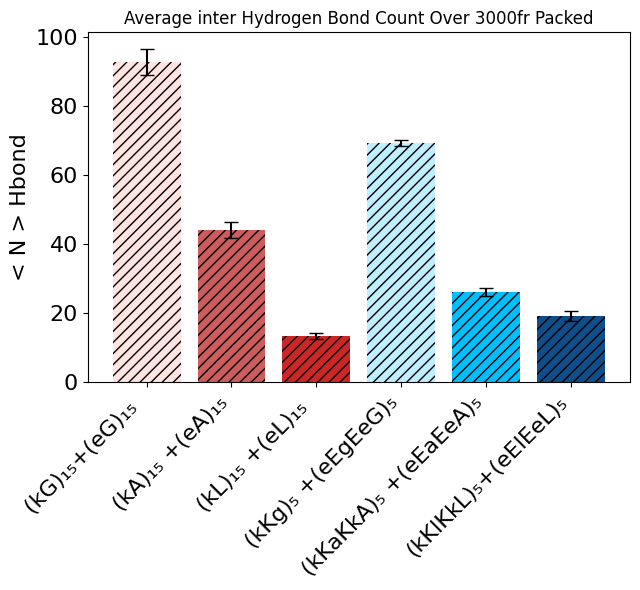

In [7]:
# Hbonding bloack averages w/ python script
data_mean=np.zeros(6)
data_err=np.zeros(6)
hatch_style={"intra":"","inter":"///"}

for data_type in ["intra","inter"]:
    plt.figure(figsize=(6.5,6))
    
    for i in range(6):
        v, blockVar, blockMean = blockAverage(data[i][data_type].tail(3000), isplot=False)
        print("<x> = {0:f} +/- {1:f}\n".format(blockMean[-1], np.sqrt(blockVar[-1])))
        data_mean[i] = blockMean[-1]
        data_err[i] = np.sqrt(blockVar[-1])

    plt.bar(style.sys_labels, data_mean,color=style.color_arr, yerr=data_err, capsize=5,hatch=hatch_style[data_type])

    plt.yticks(fontsize = style.font_size)
    plt.xticks(fontsize = style.font_size, rotation=45, ha='right')

    plt.ylabel('< N > Hbond', fontsize = style.font_size)
    plt.title("Average "+data_type+" Hydrogen Bond Count Over 3000fr Packed")

    plt.tight_layout()
    #plt.savefig("HB_"+data_type+"_3000fr.png",dpi=600)

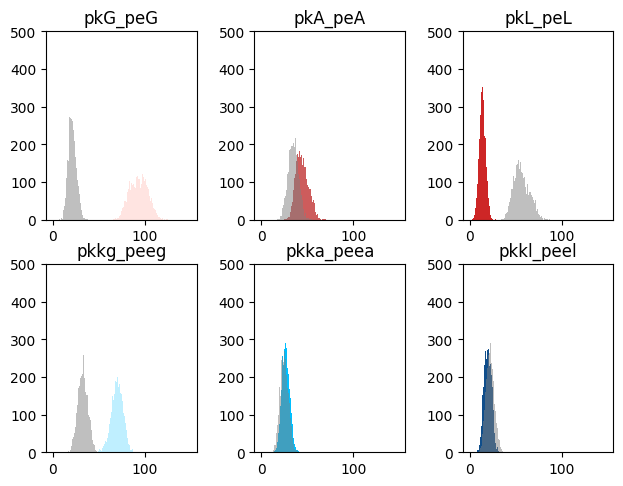

In [8]:
# Initialise the subplot function using number of rows and columns
figure, axis = plt.subplots(2, 3)
figure.tight_layout()

count=0
for i in range(2):
    for j in range(3):
        #axis[i, j].set_xlim(-1,10)
        axis[i, j].hist(data[count]["inter"].tail(3000), bins=range(150), color=style.color_arr[count])
        axis[i, j].hist(data[count]["intra"].tail(3000), bins=range(150), color="grey", alpha=0.5)
        axis[i, j].set_ylim(0,500)
        axis[i, j].set_title(sys[count])
        count+=1